In [6]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [7]:
df_sample = df_sample.reset_index(drop=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [9]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64


In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [11]:
from imblearn.under_sampling import TomekLinks

#Resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

In [12]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [13]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [14]:
# import the necessary libraries
import pandas as pd
import numpy as np
# convert X_test to a pandas dataframe
X_test = pd.DataFrame(X_test, columns=X_train.columns)
# define a function to replace outliers with MAD for a single column
def replace_outliers_with_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    threshold = 2.5 * mad
    column[np.abs(column - median) > threshold] = median
    return column

# apply the function to all columns of X_train_resampled_final
for i in range(X_train_resampled_final.shape[1]):
    X_train_resampled_final.iloc[:, i] = replace_outliers_with_mad(X_train_resampled_final.iloc[:, i])

# apply the function to all columns of X_test
for i in range(X_test.shape[1]):
    X_test.iloc[:, i] = replace_outliers_with_mad(X_test.iloc[:, i])

# convert the numpy arrays back to pandas dataframes
X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# print the modified dataframes
print(X_train_resampled_final)
print(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


        step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        277    1933.640000    7193.000000             0.0        0.000000   
1        138   44423.330000   55375.500000             0.0    80063.060791   
2        325  143024.735000    4564.000000             0.0    80063.060791   
3        308  300712.340000   51474.000000             0.0    80063.060791   
4        349   47243.760000   11262.000000             0.0        0.000000   
...      ...            ...            ...             ...             ...   
407081   277  111168.880136  111168.880136             0.0    80063.060791   
407082   274  143024.735000   55375.500000             0.0    80063.060791   
407083    60  143024.735000   55375.500000             0.0        0.000000   
407084   449   44882.356239   44882.356239             0.0        0.000000   
407085   220   39953.091459   29059.334627             0.0    80063.060791   

        newbalanceDest  isFlaggedFraud  type  nameDest  nameOri

In [15]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(X_train_resampled_final)
X_train_resampled_final = model.transform(X_train_resampled_final)

In [16]:
# compute required values
scaler = StandardScaler()
model = scaler.fit(X_test)
X_test = model.transform(X_test)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6321/6361 [============================>.] - ETA: 0s - loss: 0.5503WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000021B40FC0E58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6361/6361 [==============================] - 15s 2ms/step - loss: 0.5497 - val_loss: 0.5528
Epoch 2/15
6361/6361 [==============================] - 15s 2ms/st

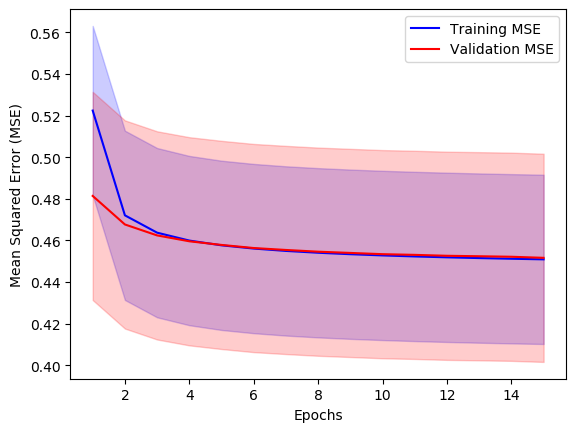

In [17]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
from keras import regularizers
from keras.callbacks import EarlyStopping
# Set random seed for reproducibility
np.random.seed(42)

# Define the autoencoder architecture
input_dim = X_train_resampled_final.shape[1]
encoding_dim = 32
decoding_dim = 10

input_layer = Input(shape=(input_dim,))
#hidden_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Add L1 regularization to the hidden layer
hidden_layer = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l1(0.00991))(input_layer)

output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# Define the optimizer with the desired learning rate

opt = Adam(lr= 0.00087)
# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
#autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.compile(optimizer=opt, loss='mse')

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits)

# Define lists to store the MSE of training and validation sets for each fold
train_mse = []
val_mse = []
test_mse = []
recon_errors = []


# Loop over each fold
for train_index, val_index in kf.split(X_train_resampled_final):
    
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Fit the autoencoder on the training set for the current fold
    history = autoencoder.fit(X_train_fold, X_train_fold, epochs=15,batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
    # Append the MSE of training and validation sets for the current fold to the lists
    train_mse.append(history.history['loss'])
    val_mse.append(history.history['val_loss'])
    
    # compute the reconstruction error for the test data
    recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    recon_errors.append(recon_error)
    
    # Calculate the MSE for the test set
    test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    test_mse.append(test_error)
    print(f"Test MSE: {test_error:.5f}")

# Calculate the mean and standard deviation of MSE for training and validation sets across all folds
mean_train_mse = np.mean(train_mse, axis=0)
#std_train_mse = np.std(np.array(train_mse), axis=0)
std_train_mse = np.std(np.concatenate(train_mse), axis=0)

mean_val_mse = np.mean(val_mse, axis=0)
#std_val_mse = np.std(np.array(val_mse), axis=0)
std_val_mse = np.std(np.concatenate(val_mse), axis=0)


# Plot the MSE of training and validation sets against the number of epochs
epochs = range(1, len(mean_train_mse)+1)
plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [18]:
# Generate reconstructed outputs for the test set
reconstructed = autoencoder.predict(X_test)

# Calculate the MSE between the input and the reconstructed output for each data point
recon_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2188/2188 [==============================] - 3s 1ms/step


In [19]:
test_mse_fold = np.mean(recon_errors)
test_mse.append(test_mse_fold)

In [20]:
# Print the final mean and standard deviation of reconstruction error across all folds
print(f"Mean Reconstruction Error: {np.mean(test_mse):.5f}")

Mean Reconstruction Error: 0.44061


In [21]:
mse = autoencoder.evaluate(X_test, X_test)
print('Mean squared error on test data:', mse)

2188/2188 [==============================] - 3s 1ms/step - loss: 0.4418
Mean squared error on test data: 0.44184693694114685


In [22]:
mean_train_mse_avg = np.mean(mean_train_mse)
print("Mean Train MSE (Average):", mean_train_mse_avg)

Mean Train MSE (Average): 0.4603436142206192


In [23]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________


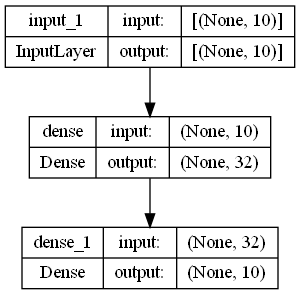

In [24]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder_last.png', show_shapes=True)

## Extract hidden layer from autoencder

In [25]:
hidden_layer_output = autoencoder.layers[1].output
new_layer = Dense(2, activation='relu')(hidden_layer_output)
hidden_layer_model = Model(inputs=autoencoder.input, outputs=new_layer)

In [28]:
hidden_layer_output.summary()

AttributeError: 'KerasTensor' object has no attribute 'summary'

In [26]:
hidden_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [27]:
hidden_layer_model .compile(optimizer='adam', loss='mse')
hidden_layer_model .fit(hidden_layer_output, y_train_resampled_final, epochs=4)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
# create a new model that outputs the hidden layer
hidden_layer_output = autoencoder.layers[1].output
hidden_layer_model = Model(inputs=autoencoder.input, outputs=hidden_layer_output)

# get the hidden layer output for a sample
sample_hidden_output = hidden_layer_model.predict(X_train_resampled_final[0].reshape(1, -1))
print(sample_hidden_output)

In [ ]:
# Pass your data through the hidden layer model
hidden_layer_data = hidden_layer_model.predict(X_train_resampled_final)

# Print the shape of the hidden layer data
print(hidden_layer_data.shape)

# Print the first few rows of the hidden layer data
print(hidden_layer_data[:5])

In [ ]:
hidden_layer_output

In [ ]:
# # create the mediator network with the hidden layer output as input
# mediator_input_layer = Input(shape=hidden_layer_output.shape[1:])
# mediator_hidden_layer = Dense(11, activation='relu', kernel_regularizer=regularizers.l1(0.0391))(mediator_input_layer)
# mediator_output_layer = Dense(2, activation='sigmoid')(mediator_hidden_layer)

# mediator_network = Model(inputs=mediator_input_layer, outputs=mediator_output_layer)
# mediator_network.compile(optimizer='adam', loss='mse')
# mediator_network.fit(hidden_layer_model.predict(X_train_resampled_final), y_train_resampled_final, epochs=1, batch_size=32)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# create a dictionary with the hyperparameters to be optimized
param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(1, 21)], # test 1 to 20 neurons in the hidden layer
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam']
}

# create the MLPClassifier model
mlp = MLPClassifier(max_iter=10)

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train_resampled_final, y_train_resampled_final)

# print the best hyperparameters and corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)

In [ ]:
hidden_layer_model.summary()

In [ ]:
history = mediator_network.fit(hidden_layer_output, y_train_resampled_final, epochs=2, validation_split=0.2)

print("Train Loss:", history.history['loss'][0])
print("Validation Loss:", history.history['val_loss'][0])

## Best number of neurons: mediator network

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
decoding_dim = 10

# extract hidden layer output from autoencoder
hidden_layer_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)
hidden_layer_output = hidden_layer_model.predict(X_train_resampled_final)

# create the mediator network with the hidden layer output as input
mediator_input_layer = Input(shape=(encoding_dim,))
mediator_hidden_layer = Dense(10, activation='relu')(mediator_input_layer)
mediator_output_layer = Dense(2, activation='sigmoid')(mediator_hidden_layer)

mediator_network = Model(inputs=mediator_input_layer, outputs=mediator_output_layer)
mediator_network.compile(optimizer='adam', loss='mse')
mediator_network.fit(hidden_layer_output, y_train_resampled_final, epochs=1)

In [ ]:
history = mediator_network.fit(hidden_layer_output, y_train_resampled_final, epochs=3, validation_split=0.2)

print("Train Loss:", history.history['loss'][0])
print("Validation Loss:", history.history['val_loss'][0])

In [ ]:
history = mediator_network.fit(hidden_layer_output, y_train_resampled_final, epochs=10, validation_split=0.2)

train_loss_mean = sum(history.history['loss']) / len(history.history['loss'])
val_loss_mean = sum(history.history['val_loss']) / len(history.history['val_loss'])

print("Train Loss Mean:", train_loss_mean)
print("Validation Loss Mean:", val_loss_mean)

In [ ]:
print(history.history.keys())

In [ ]:
from sklearn import metrics
print(sorted(metrics.SCORERS.keys()))

In [ ]:
# import matplotlib.pyplot as plt
# from keras.layers import Input, Dense
# from keras.models import Model
# from keras.optimizers import Adam
# from sklearn.model_selection import KFold
# import numpy as np
# from keras import regularizers
# from keras.callbacks import EarlyStopping
# # Set random seed for reproducibility
# np.random.seed(42)

# # # Define the autoencoder architecture
# # #Input layer
# # input_dim = X_train_resampled_final.shape[1]
# # #Hidden layer
# # encoding_dim = 11
# # #Output layer
# # decoding_dim = 10

# mediator_input_layer = Input(shape=hidden_layer_output.shape[1:])
# mediator_hidden_layer = Dense(32, activation='relu')(mediator_input_layer)
# mediator_output_layer = Dense(2, activation='sigmoid')(mediator_hidden_layer)
# # input_layer = Input(shape=(input_dim,))
# # #hidden_layer = Dense(encoding_dim, activation='relu')(input_layer)

# # # Add L1 regularization to the hidden layer
# # hidden_layer = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l1(0.00991))(mediator_input_layer)

# # output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# # Define the optimizer with the desired learning rate

# opt = Adam(lr= 0.00087)
# # # Define the autoencoder model
# # autoencoder = Model(inputs=input_layer, outputs=output_layer)
# # #autoencoder.compile(optimizer='adam', loss='mse')
# # autoencoder.compile(optimizer=opt, loss='mse')
# mediator_network = Model(inputs=mediator_input_layer, outputs=mediator_output_layer)
# mediator_network.compile(optimizer='adam', loss='mse')


# # Define the number of folds for cross-validation
# n_splits = 2
# kf = KFold(n_splits=n_splits)

# # Define lists to store the MSE of training and validation sets for each fold
# train_mse = []
# val_mse = []
# test_mse = []
# recon_errors = []


# # Loop over each fold
# for train_index, val_index in kf.split(X_train_resampled_final):
    
#     # Split the data into training and validation sets for the current fold
#     X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#     # Fit the mediator ne on the training set for the current fold
#     history = mediator_network.fit(X_train_fold, X_train_fold, epochs=5, batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
#     # Append the MSE of training and validation sets for the current fold to the lists
#     train_mse.append(history.history['loss'])
#     val_mse.append(history.history['val_loss'])
    
#     # compute the reconstruction error for the test data
#     recon_error = mediator_network.evaluate(X_test, X_test, verbose=0)
#     recon_errors.append(recon_error)
    
#     # Calculate the MSE for the test set
#     test_error = mediator_network.evaluate(X_test, X_test, verbose=0)
#     test_mse.append(test_error)
#     print(f"Test MSE: {test_error:.5f}")

# # Calculate the mean and standard deviation of MSE for training and validation sets across all folds
# mean_train_mse = np.mean(train_mse, axis=0)
# #std_train_mse = np.std(np.array(train_mse), axis=0)
# std_train_mse = np.std(np.concatenate(train_mse), axis=0)

# mean_val_mse = np.mean(val_mse, axis=0)
# #std_val_mse = np.std(np.array(val_mse), axis=0)
# std_val_mse = np.std(np.concatenate(val_mse), axis=0)


# # Plot the MSE of training and validation sets against the number of epochs
# epochs = range(1, len(mean_train_mse)+1)
# plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
# plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
# plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
# plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.legend()
# plt.show()